<a href="https://colab.research.google.com/github/sdmuzel/API_Pandas_on_Spark/blob/main/pandas_api_on_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API do Pandas, o antigo Koalas

Comumente usado por cientistas de dados, o **Pandas** fornece uma estrutura de dados facil, além de ferramentas para a análise de dados na linguagem Python. No entanto, o pandas não é dimensionado para Big Data.<br>
O Koalas preenche essa lacuna, fornecendo API equivalentes ao pandas que funcionam no Apache Spark.
Koalas é útil não apenas para usuários de pandas, mas também para usuários do PySpark, porque ela oferece suporte a muitas tarefas difíceis de fazer com o PySpark, por exemplo, plotar dados diretamente de um PySpark DataFrame.

O **Koalas** está incluído em clusters que executam o Databricks Runtime 7.3 a 9.1. Para clusters que executam o Databricks Runtime 10.0 ou superior, use a **API Pandas no Spark** .

Para importar o **Koalas** podemos utilizar `import databricks.koalas as ks` <br>
Já para importar a **API do Pandas** no Spark, utilizamos `import pyspark.pandas as ps`

Como estamos utilizando um runtime de 10.4, vamos utilizar a versão da API, pois caso tentássemos rodar a versão do Koalas receberíamos um erro: `WARNING:root:Found pyspark version "3.2.1" caso tentássemos rodar a versão do Koalas receberíamos um erro:  The pyspark version 3.2 and above has a built-in "pandas APIs on Spark" module ported from Koalas. Try `import pyspark.pandas as ps` instead. `

## Criação de Series e DataFrames

In [ ]:
import numpy as np
import pandas as pd

import pyspark.pandas as ps

In [ ]:
# Criando um Series do pandas
pandas = pd.Series([1, 3, 5, np.nan, 6, 8])

# Criando um Series com a API ( Kolas)
koalas = ps.Series([1, 3, 5, np.nan, 6, 8])

print ("pandas\n", pandas)
print('=============')
print ("Koalas\n", koalas)

pandas
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
Koalas
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
# Criando um Series no Koalas a partir de um Series no pandas
pandas_to_koalas = ps.from_pandas(pandas)
pandas_to_koalas

Out[3]: 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
#OBS: como são números randomicos os valores do DF não serão o mesmos

# pandas DataFrame
pandas_df = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})


# koalas DataFrame
koalas_df = ps.DataFrame({'A': np.random.rand(5),
                     'B': np.random.rand(5)})

In [ ]:
pandas_df

,A,B
0,0.967889,0.614129
1,0.406790,0.603375
2,0.202231,0.919195
3,0.515069,0.841398
4,0.749303,0.357517


In [ ]:
koalas_df

,A,B
0,0.269387,0.901807
1,0.565589,0.384133
2,0.247024,0.857268
3,0.406823,0.613506
4,0.639232,0.609656


In [ ]:
type(pandas_df)

Out[18]: pandas.core.frame.DataFrame

In [ ]:
type(koalas_df)
# caso estivessemos utilizando a versão Koalas,
# o nosso retorno seria : databricks.koalas.frame.DataFrame

Out[19]: pyspark.pandas.frame.DataFrame

In [ ]:
# Criando um DataFrame koalas, a partir de um pandas DataFrame
pandas_to_koalas_df = ps.from_pandas(pandas_df)
pandas_to_koalas_df

,A,B
0,0.967889,0.614129
1,0.406790,0.603375
2,0.202231,0.919195
3,0.515069,0.841398
4,0.749303,0.357517


## Opções e configurações
A API do Pandas no Spark possui um sistema de opções que permite personalizar alguns aspectos de seu comportamento, sendo as opções relacionadas à exibição dos dataframes.

As opções mais relevantes são:
- get_option() / set_option() - obter/definir o valor de uma única opção.
- reset_option() - redefinir as opções para o padrão



Para mais configurações consulte a documentação: https://spark.apache.org/docs/3.2.0/api/python/user_guide/pandas_on_spark/options.html

In [ ]:
ps.get_option("display.max_rows")

In [ ]:
ps.set_option("display.max_rows", 999)
ps.get_option("display.max_rows")

In [ ]:
ps.reset_option("display.max_rows")
ps.get_option("display.max_rows")

#  Manipulando o DataFrame

### Infos iniciais

In [ ]:
cursos   = ({
    'curso':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python", "Kolas"],
    'num_aluno' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'duracao':[30,50,55,40,60,35,30,50,None]
          })


df = ps.DataFrame(cursos)

In [ ]:
df.head(2)

,curso,num_aluno,duracao
0,Spark,22000,30
1,PySpark,25000,50


In [ ]:
df.tail(2)

,curso,num_aluno,duracao
7,Python,22000,50.0
8,Kolas,1500,NaN


In [ ]:
df.describe()

,num_aluno,duracao
count,9.000000,8.000000
mean,21500.000000,43.750000
std,7632.168761,11.572751
min,1500.000000,30.000000
25%,22000.000000,30.000000
50%,24000.000000,40.000000
75%,25000.000000,50.000000
max,26000.000000,60.000000


In [ ]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   curso      9 non-null      object 
 1   num_aluno  9 non-null      int64  
 2   duracao    8 non-null      float64
dtypes: float64(1), int64(1), object(1)

In [ ]:
df.curso.unique()

Out[12]: 0      Spark
1    PySpark
2     Hadoop
3     Python
4     Pandas
5      Kolas
Name: curso, dtype: object

In [ ]:
df.curso.value_counts()

Out[13]: Spark      2
Hadoop     2
Python     2
PySpark    1
Pandas     1
Kolas      1
Name: curso, dtype: int64

In [ ]:
df.sort_values(by='duracao')

,curso,num_aluno,duracao
0,Spark,22000,30.0
6,Spark,25000,30.0
5,Hadoop,25000,35.0
3,Python,24000,40.0
1,PySpark,25000,50.0
7,Python,22000,50.0
2,Hadoop,23000,55.0
4,Pandas,26000,60.0
8,Kolas,1500,NaN


### Seleção e  Filtros

In [ ]:
df['curso']

Out[15]: 0      Spark
1    PySpark
2     Hadoop
3     Python
4     Pandas
5     Hadoop
6      Spark
7     Python
8      Kolas
Name: curso, dtype: object

In [ ]:
df.curso

Out[16]: 0      Spark
1    PySpark
2     Hadoop
3     Python
4     Pandas
5     Hadoop
6      Spark
7     Python
8      Kolas
Name: curso, dtype: object

In [ ]:
df[['curso', 'num_aluno']]

,curso,num_aluno
0,Spark,22000
1,PySpark,25000
2,Hadoop,23000
3,Python,24000
4,Pandas,26000
5,Hadoop,25000
6,Spark,25000
7,Python,22000
8,Kolas,1500


In [ ]:
df.loc[1:2]

,curso,num_aluno,duracao
1,PySpark,25000,50.0
2,Hadoop,23000,55.0


In [ ]:
df.iloc[:3, 1:2]

,num_aluno
0,22000
1,25000
2,23000


In [ ]:
df[df.curso == 'Python']

,curso,num_aluno,duracao
3,Python,24000,40.0
7,Python,22000,50.0


In [ ]:
df.loc[(df.curso == 'Python')]

,curso,num_aluno,duracao
3,Python,24000,40.0
7,Python,22000,50.0


In [ ]:
df[(df.curso == 'Python')& (df.num_aluno > 23000)]

,curso,num_aluno,duracao
3,Python,24000,40.0


In [ ]:
df.loc[(df.curso == 'Python')& (df.num_aluno > 23000)]

,curso,num_aluno,duracao
3,Python,24000,40.0


In [ ]:
df.query(" curso == 'Python' and num_aluno > 23000 ")

,curso,num_aluno,duracao
3,Python,24000,40.0


In [ ]:
df[df['curso'].str.contains('P|y')]

,curso,num_aluno,duracao
1,PySpark,25000,50.0
3,Python,24000,40.0
4,Pandas,26000,60.0
7,Python,22000,50.0


#### ATIVIDADE 3

In [ ]:
koalas_df = ps.DataFrame({'A': np.random.rand(5),
                     'B': np.random.rand(5),
                        'C': np.random.rand(5)})

koalas_df

,A,B,C
0,0.532532,0.474152,0.370685
1,0.547691,0.640551,0.467312
2,0.555241,0.545973,0.566487
3,0.308600,0.318387,0.424006
4,0.968176,0.011412,0.769048


In [ ]:
koalas_df['C']

Out[172]: 0    0.370685
1    0.467312
2    0.566487
3    0.424006
4    0.769048
Name: C, dtype: float64

In [ ]:
koalas_df.loc[3:4]

,A,B,C
3,0.308600,0.318387,0.424006
4,0.968176,0.011412,0.769048


In [ ]:
koalas_df.apply(np.sum)

Out[174]: A    2.912241
B    1.990475
C    2.597537
dtype: float64

In [ ]:
koalas_df[3:4]

,A,B,C
3,0.3086,0.318387,0.424006


### Adicionando e renomeando colunas

In [ ]:
new_data = ps.Series([1000,2300,1000,1200,2500,None,1400,1600,0], index= range(1,10))
new_data


Out[3]: 1    1000.0
2    2300.0
3    1000.0
4    1200.0
5    2500.0
6       NaN
7    1400.0
8    1600.0
9       0.0
dtype: float64

In [ ]:
df['new_data'] = new_data

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-1801012934352295> in <cell line: 1>()
----> 1 df['preco'] = new_data

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/frame.py in __setitem__(self, key, value)
  12416                         yield (psdf._psser_for(this_label), this_label)
  12417 
> 12418             psdf = align_diff_frames(assign_columns, self, value, fillna=False, how="left")
  12419         elif isinstance(value, list):
  12420             if len(self) != len(value):

/databricks/spark/python/pyspark/pandas/

esse erro ocorreu porque a API do Pandas não permite a adição de colunas provenientes de DF ou de Series em outro DF, visto que essa ação utiliza processos de junções (joins/merge) os quais, em geral, são caras

Para habilitar essa opção deve utilizar o comando *compute.ops_on_diff_frames = True*

In [ ]:
from pyspark.pandas.config import set_option, reset_option

set_option("compute.ops_on_diff_frames", True)

In [ ]:
df['new_data'] = new_data
df


,curso,num_aluno,duracao,new_data
0,Spark,22000,30.0,NaN
1,PySpark,25000,50.0,1000.0
2,Hadoop,23000,55.0,2300.0
3,Python,24000,40.0,1000.0
4,Pandas,26000,60.0,1200.0
5,Hadoop,25000,35.0,2500.0
6,Spark,25000,30.0,NaN
7,Python,22000,50.0,1400.0
8,Kolas,1500,NaN,1600.0


In [ ]:
df[df.new_data > 2000]

,curso,num_aluno,duracao,new_data
2,Hadoop,23000,55.0,2300.0
5,Hadoop,25000,35.0,2500.0


In [ ]:
# Para voltar as configurações originais, é só utilizar o comando
reset_option("compute.ops_on_diff_frames")

In [ ]:
df = df.rename(columns={'new_data': 'preco'})
df.head(2)

,curso,num_aluno,duracao,preco
0,Spark,22000,30.0,NaN
1,PySpark,25000,50.0,1000.0


### Merge, Join e Concat

- Merge: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.merge.html

- Join: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.join.html

- Concat: https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.concat.html

In [ ]:
technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Students' :[22000,25000,24000,26000],
    'Duration':['30','50','40','50'],
              }
index_labels=['r1','r2','r3','r4']
df1 = ps.DataFrame(technologies,index=index_labels)
df1

,Courses,Students,Duration
r1,Spark,22000,30
r2,PySpark,25000,50
r3,Python,24000,40
r4,pandas,26000,50


In [ ]:
technologies2 = {
    'Courses':["Spark","Java","Python","Go", "PySpark"],
    'Price':[None,2300,1200,1000, 1000]
              }
index_labels2=['r1','r6','r3','r5', 'r2']
df2 = ps.DataFrame(technologies2,index=index_labels2)
df2

,Courses,Price
r1,Spark,NaN
r6,Java,2300.0
r3,Python,1200.0
r5,Go,1000.0
r2,PySpark,1000.0


In [ ]:
df3= ps.merge(df1,df2)
df3

,Courses,Students,Duration,Price
0,Spark,22000,30,NaN
1,PySpark,25000,50,1000.0
2,Python,24000,40,1200.0


In [ ]:
df3=df1.merge(df2)
df3

,Courses,Students,Duration,Price
0,Spark,22000,30,NaN
1,PySpark,25000,50,1000.0
2,Python,24000,40,1200.0


In [ ]:
df3=df1.merge(df2, on='Courses')
df3

,Courses,Students,Duration,Price
0,Spark,22000,30,NaN
1,PySpark,25000,50,1000.0
2,Python,24000,40,1200.0


In [ ]:
df4 = df1.join(df2)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-1732302969748969> in <cell line: 1>()
----> 1 df4 = df1.join(df2)

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/frame.py in join(self, right, on, how, lsuffix, rsuffix)
   8009             common = list(self.columns.intersection(right.columns))
   8010         if len(common) > 0 and not lsuffix and not rsuffix:
-> 8011             raise ValueError(
   8012                 "columns overlap but no suffix specified: " "{rename}".format(rename=common)
   8013             )

ValueE

In [ ]:
df4 = df1.join(df2, lsuffix="_left", rsuffix="_right")
df4

,Courses_left,Students,Duration,Courses_right,Price
r1,Spark,22000,30,Spark,NaN
r2,PySpark,25000,50,PySpark,1000.0
r3,Python,24000,40,Python,1200.0
r4,pandas,26000,50,None,NaN


In [ ]:
df4 = df1.join(df2, lsuffix="_left", rsuffix="_right", how='outer')
df4

,Courses_left,Students,Duration,Courses_right,Price
r1,Spark,22000.0,30,Spark,NaN
r2,PySpark,25000.0,50,PySpark,1000.0
r3,Python,24000.0,40,Python,1200.0
r4,pandas,26000.0,50,None,NaN
r5,None,NaN,None,Go,1000.0
r6,None,NaN,None,Java,2300.0


In [ ]:
df5 = df4.drop(columns = 'Courses_left')
df5

,Students,Duration,Courses_right,Price
r1,22000.0,30,Spark,NaN
r2,25000.0,50,PySpark,1000.0
r3,24000.0,40,Python,1200.0
r4,26000.0,50,None,NaN
r5,NaN,None,Go,1000.0
r6,NaN,None,Java,2300.0


In [ ]:
df6 = ps.concat([df,df5])
df6

,curso,num_aluno,duracao,Students,Duration,Courses_right,Price
r1,None,NaN,NaN,22000.0,30,Spark,NaN
r2,None,NaN,NaN,25000.0,50,PySpark,1000.0
r3,None,NaN,NaN,24000.0,40,Python,1200.0
r4,None,NaN,NaN,26000.0,50,None,NaN
r5,None,NaN,NaN,NaN,None,Go,1000.0
r6,None,NaN,NaN,NaN,None,Java,2300.0
0,Spark,22000.0,30.0,NaN,None,None,NaN
1,PySpark,25000.0,50.0,NaN,None,None,NaN
2,Hadoop,23000.0,55.0,NaN,None,None,NaN
3,Python,24000.0,40.0,NaN,None,None,NaN


In [ ]:
df5 = df5[['Courses_right', 'Students', 'Duration', 'Price']]
df5.head(2)

,Courses_right,Students,Duration,Price
r1,Spark,22000,30,NaN
r2,PySpark,25000,50,1000.0


In [ ]:
df5 = df5.rename(columns={'Courses_right': 'curso',
                          'Students':'num_aluno',
                          'Duration':'duracao',
                          'Price':'preco'})
df5.head(2)

,curso,num_aluno,duracao,preco
r1,Spark,22000,30,NaN
r2,PySpark,25000,50,1000.0


In [ ]:
df6 = ps.concat([df,df5])
df6

,curso,num_aluno,duracao,preco
r1,Spark,22000.0,30,NaN
r2,PySpark,25000.0,50,1000.0
r3,Python,24000.0,40,1200.0
r4,None,26000.0,50,NaN
r5,Go,NaN,None,1000.0
r6,Java,NaN,None,2300.0
0,Spark,22000.0,30.0,NaN
1,PySpark,25000.0,50.0,NaN
2,Hadoop,23000.0,55.0,NaN
3,Python,24000.0,40.0,NaN


In [ ]:
df6.reset_index(inplace= True, drop=True)
df6

,curso,num_aluno,duracao,preco
0,Spark,22000.0,30.0,NaN
1,PySpark,25000.0,50.0,NaN
2,Hadoop,23000.0,55.0,NaN
3,Python,24000.0,40.0,NaN
4,Pandas,26000.0,60.0,NaN
5,Hadoop,25000.0,35.0,NaN
6,Spark,25000.0,30.0,NaN
7,Python,22000.0,50.0,NaN
8,Kolas,1500.0,None,NaN
9,Spark,22000.0,30,NaN


###  Dados duplicados e Dados Nulos

**Dados duplicados**

df.duplicated: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.duplicated.html?highlight=duplicates

Series.drop_duplicates: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.Series.drop_duplicates.html?highlight=duplicates#pyspark.pandas.Series.drop_duplicates


df.drop_duplicates: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.drop_duplicates.html?highlight=duplicates#pyspark.pandas.DataFrame.drop_duplicates


Index.drop_duplicates: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.Index.drop_duplicates.html?highlight=duplicates#pyspark.pandas.Index.drop_duplicates


Index.has_duplicates: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.Index.has_duplicates.html?highlight=duplicates#pyspark.pandas.Index.has_duplicates

In [ ]:
df6.duplicated().sort_index()

Out[89]: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
df6.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   curso      14 non-null     object 
 1   num_aluno  13 non-null     int64  
 2   duracao    12 non-null     object 
 3   preco      11 non-null     float64
dtypes: float64(1), int64(1), object(2)

In [ ]:
df6['duracao'] = df6['duracao'].astype(int)

In [ ]:
df6.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   curso      14 non-null     object 
 1   num_aluno  13 non-null     int64  
 2   duracao    12 non-null     int64  
 3   preco      11 non-null     float64
dtypes: float64(1), int64(2), object(1)

In [ ]:
df6.duplicated().sort_index()

Out[112]: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
df6.duplicated(keep='last').sort_index()

Out[114]: 0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
df6.duplicated(keep=False).sort_index()

Out[115]: 0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
 df6.duplicated( ).sum()

Out[116]: 2

In [ ]:
df6.drop_duplicates(inplace = True)

In [ ]:
df6.reset_index(inplace= True, drop=True)
df6

,curso,num_aluno,duracao,preco
0,None,26000.0,50,NaN
1,Go,NaN,None,1000.0
2,Hadoop,23000.0,55.0,NaN
3,Hadoop,25000.0,35.0,NaN
4,Java,NaN,None,2300.0
5,Kolas,1500.0,None,NaN
6,Pandas,26000.0,60.0,NaN
7,PySpark,25000.0,50,1000.0
8,PySpark,25000.0,50.0,NaN
9,Python,22000.0,50.0,NaN


In [ ]:
df6.isna().sum()

Out[26]: curso         1
num_aluno     2
duracao       3
preco        11
dtype: int64

In [ ]:
df6.isna().sum()/len(df6) *100

Out[130]: curso         6.666667
num_aluno    13.333333
duracao      20.000000
preco        26.666667
dtype: float64

**Dados Nulos**

- notnull(): https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.notnull.html?highlight=notnull#pyspark.pandas.notnull
- notna(): https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.notna.html?highlight=notna#pyspark.pandas.DataFrame.notna
- dropna(): https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.dropna.html?highlight=dropna#pyspark.pandas.DataFrame.dropna
- fillna(): https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.fillna.html?highlight=fillna#pyspark.pandas.DataFrame.fillna

In [ ]:
df7 = df6[df6.curso.notnull()]
df7

,curso,num_aluno,duracao,preco
1,Go,NaN,None,1000.0
2,Hadoop,23000.0,55.0,NaN
3,Hadoop,25000.0,35.0,NaN
4,Java,NaN,None,2300.0
5,Kolas,1500.0,None,NaN
6,Pandas,26000.0,60.0,NaN
7,PySpark,25000.0,50,1000.0
8,PySpark,25000.0,50.0,NaN
9,Python,22000.0,50.0,NaN
10,Python,24000.0,40,1200.0


In [ ]:
df8 = df6.dropna()
df8

,curso,num_aluno,duracao,preco
2,Hadoop,23000,55.0,2300.0
3,Hadoop,25000,35.0,2500.0
6,Pandas,26000,60.0,1200.0
7,PySpark,25000,50,1000.0
8,PySpark,25000,50.0,1000.0
9,Python,22000,50.0,1400.0
10,Python,24000,40,1200.0
11,Python,24000,40.0,1000.0


In [ ]:
df7['num_aluno'] = df7['num_aluno'].fillna(0)
df7

,curso,num_aluno,duracao,preco
1,Go,0,None,1000.0
2,Hadoop,23000,55.0,NaN
3,Hadoop,25000,35.0,NaN
4,Java,0,None,2300.0
5,Kolas,1500,None,NaN
6,Pandas,26000,60.0,NaN
7,PySpark,25000,50,1000.0
8,PySpark,25000,50.0,NaN
9,Python,22000,50.0,NaN
10,Python,24000,40,1200.0


In [ ]:
media = df7.duracao.mean()
df7['duracao'] = df7['duracao'].fillna(media)
df7

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<command-1050084061260286> in <cell line: 1>()
----> 1 media = df7.duracao.mean()
      2 df7['duracao'] = df7['duracao'].fillna(media)
      3 df7

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/generic.py in mean(self, axis, numeric_only)
   1226             return F.mean(spark_column)
   1227 
-> 1228         return self._reduce_for_stat_function(
   1229             mean, name="mean", axis=axis, numeric_only=numeric_only
   1230         )

/databricks/spark/python/pyspark/pandas/seri

In [ ]:
df7.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 14 entries, 1 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   curso      14 non-null     object 
 1   num_aluno  14 non-null     int64  
 2   duracao    11 non-null     object 
 3   preco      11 non-null     float64
dtypes: float64(1), int64(1), object(2)

In [ ]:
df7['duracao'] = df7['duracao'].astype(int)

In [ ]:
media = df7.duracao.mean()
df7['duracao'] = df7['duracao'].fillna(media)
df7

,curso,num_aluno,duracao,preco
1,Go,0,42.727273,1000.0
2,Hadoop,23000,55.000000,NaN
3,Hadoop,25000,35.000000,NaN
4,Java,0,42.727273,2300.0
5,Kolas,1500,42.727273,NaN
6,Pandas,26000,60.000000,NaN
7,PySpark,25000,50.000000,1000.0
8,PySpark,25000,50.000000,NaN
9,Python,22000,50.000000,NaN
10,Python,24000,40.000000,1200.0


In [ ]:
df7['duracao'] = df7['duracao'].round(2)
df7

,curso,num_aluno,duracao,preco
1,Go,0,42.73,1000.0
2,Hadoop,23000,55.00,NaN
3,Hadoop,25000,35.00,NaN
4,Java,0,42.73,2300.0
5,Kolas,1500,42.73,NaN
6,Pandas,26000,60.00,NaN
7,PySpark,25000,50.00,1000.0
8,PySpark,25000,50.00,NaN
9,Python,22000,50.00,NaN
10,Python,24000,40.00,1200.0


In [ ]:
df7['preco'].fillna(method ='pad', inplace=True)
df7.tail()

,curso,num_aluno,duracao,preco
10,Python,24000,40.0,1200.0
11,Python,24000,40.0,1200.0
12,Spark,22000,30.0,1200.0
13,Spark,22000,30.0,1200.0
14,Spark,25000,30.0,1200.0


### Apply e GroupBy

In [ ]:
df7[['num_aluno']].apply(np.sum)

Out[211]: num_aluno    264500
dtype: int64

In [ ]:
df7[['num_aluno', 'duracao', 'preco']].apply(np.sum)

Out[188]: num_aluno    264500.00
duracao         598.19
preco         19500.00
dtype: float64

In [ ]:
df7[['num_aluno', 'duracao', 'preco']].apply(np.sum, axis = 1)

Out[213]: 1      1042.73
2     25355.00
3     27535.00
4      2342.73
5      3142.73
6     27260.00
7     26050.00
8     26050.00
9     23450.00
10    25240.00
11    25040.00
12    23030.00
13    23030.00
14    26030.00
dtype: float64

In [ ]:
df7[['num_aluno', 'duracao', 'preco']].apply(np.cumsum, axis = 1)

,num_aluno,duracao,preco
1,0.0,42.73,1042.73
2,23000.0,23055.00,25355.00
3,25000.0,25035.00,27535.00
4,0.0,42.73,2342.73
5,1500.0,1542.73,3142.73
6,26000.0,26060.00,27260.00
7,25000.0,25050.00,26050.00
8,25000.0,25050.00,26050.00
9,22000.0,22050.00,23450.00
10,24000.0,24040.00,25240.00


In [ ]:
df7[['num_aluno', 'duracao', 'preco']].apply(lambda x: x * 2)

,num_aluno,duracao,preco
1,0,85.46,2000.0
2,46000,110.00,4600.0
3,50000,70.00,5000.0
4,0,85.46,4600.0
5,3000,85.46,3200.0
6,52000,120.00,2400.0
7,50000,100.00,2000.0
8,50000,100.00,2000.0
9,44000,100.00,2800.0
10,48000,80.00,2400.0


In [ ]:
def square(x):
    return x * 2

df7[['num_aluno', 'duracao', 'preco']].apply(square)

,num_aluno,duracao,preco
1,0,85.46,2000.0
2,46000,110.00,4600.0
3,50000,70.00,5000.0
4,0,85.46,4600.0
5,3000,85.46,3200.0
6,52000,120.00,2400.0
7,50000,100.00,2000.0
8,50000,100.00,2000.0
9,44000,100.00,2800.0
10,48000,80.00,2400.0


In [ ]:
df7.groupby(['curso']).sum()

,num_aluno,duracao,preco
curso,,,
Go,0,42.73,1000.0
Hadoop,48000,90.00,2000.0
Java,0,42.73,2300.0
Kolas,1500,42.73,2300.0
Pandas,26000,60.00,2300.0
PySpark,50000,100.00,2000.0
Python,70000,130.00,3400.0
Spark,69000,90.00,3600.0


In [ ]:
df7.groupby(['curso']).mean()

,num_aluno,duracao,preco
curso,,,
Go,0.000000,42.730000,1000.000000
Hadoop,24000.000000,45.000000,1000.000000
Java,0.000000,42.730000,2300.000000
Kolas,1500.000000,42.730000,2300.000000
Pandas,26000.000000,60.000000,2300.000000
PySpark,25000.000000,50.000000,1000.000000
Python,23333.333333,43.333333,1133.333333
Spark,23000.000000,30.000000,1200.000000


In [ ]:
df_final = df7.groupby("curso").agg({'num_aluno': 'sum',
                                     'duracao': 'mean',
                                     'preco': 'mean' })

df_final

,num_aluno,duracao,preco
curso,,,
Go,0,42.730000,1000.000000
Hadoop,48000,45.000000,1000.000000
Java,0,42.730000,2300.000000
Kolas,1500,42.730000,2300.000000
Pandas,26000,60.000000,2300.000000
PySpark,50000,50.000000,1000.000000
Python,70000,43.333333,1133.333333
Spark,69000,30.000000,1200.000000


In [ ]:
df_final.reset_index(inplace= True)
df_final

,curso,num_aluno,duracao,preco
0,Go,0,42.730000,1000.000000
1,Hadoop,48000,45.000000,1000.000000
2,Java,0,42.730000,2300.000000
3,Kolas,1500,42.730000,2300.000000
4,Pandas,26000,60.000000,2300.000000
5,PySpark,50000,50.000000,1000.000000
6,Python,70000,43.333333,1133.333333
7,Spark,69000,30.000000,1200.000000


In [ ]:
df_final [['duracao', 'preco']] = df_final [['duracao', 'preco']].round(2)
df_final

,curso,num_aluno,duracao,preco
0,Go,0,42.73,1000.00
1,Hadoop,48000,45.00,1000.00
2,Java,0,42.73,2300.00
3,Kolas,1500,42.73,2300.00
4,Pandas,26000,60.00,2300.00
5,PySpark,50000,50.00,1000.00
6,Python,70000,43.33,1133.33
7,Spark,69000,30.00,1200.00


In [ ]:
#salvando
df_final.to_csv('df_cursos.csv')

# Gráficos e SQL

### SQL: comandos iniciais

Uma das funcionalidades que temos na API do Pandas é realizar querys assim como fazemos no PySpark

In [ ]:
technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Students' :[22000,25000,24000,26000],
    'Duration':['30','50','40','50'],
  'COD':['r1','r2','r3','r4']}

df1 = ps.DataFrame(technologies)
df1

,Courses,Students,Duration,COD
0,Spark,22000,30,r1
1,PySpark,25000,50,r2
2,Python,24000,40,r3
3,pandas,26000,50,r4


In [ ]:
technologies2 = {
    'Courses':["Spark","Java","Python","Go", "PySpark"],
    'Price':[None,2300,1200,1000, 1000],
  'COD': ['r1','r6','r3','r5', 'r2']  }

df2 = ps.DataFrame(technologies2)
df2

,Courses,Price,COD
0,Spark,NaN,r1
1,Java,2300.0,r6
2,Python,1200.0,r3
3,Go,1000.0,r5
4,PySpark,1000.0,r2


In [ ]:
# explorando o df1 da forma clássica

ps.sql("SELECT * FROM df1 WHERE Duration > 35 ")

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-1941511453500492> in <cell line: 3>()
      1 # explorando o df1
      2 
----> 3 ps.sql("SELECT * FROM df1 WHERE Price > 2300 ")

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/sql_formatter.py in sql(query, index_col, **kwargs)
    167     formatter = PandasSQLStringFormatter(session)
    168     try:
--> 169         sdf = session.sql(formatter.format(query, **kwargs))
    170     finally:
    171         formatter.clear()

/databricks/spark/python/pyspark/instrumentation_util

In [ ]:
# explorando o df1 no Koalas

ps.sql("SELECT * FROM {DF} WHERE Duration > 35 ", DF=df1)

,Courses,Students,Duration,COD
0,PySpark,25000,50,r2
1,Python,24000,40,r3
2,pandas,26000,50,r4


In [ ]:
ps.sql("SELECT * FROM {DF} WHERE Price = 1200.0 ", DF=df2)

,Courses,Price,COD
0,Python,1200.0,r3


In [ ]:
# unindo os dois df
ps.sql ('''
SELECT
  a.Courses,
  a.Students,
  a.Duration,
  b.Price

FROM {DF1} a
  INNER JOIN {DF2} b
  ON a.COD = b.COD

''', DF1 = df1, DF2 = df2 )

,Courses,Students,Duration,Price
0,Spark,22000,30,NaN
1,PySpark,25000,50,1000.0
2,Python,24000,40,1200.0


In [ ]:
# passando a união dos DFs para uma variável
df3  = ps.sql ('''
                SELECT
                  a.Courses,
                  a.Students,
                  a.Duration,
                  b.Price

                FROM {DF1} a
                  INNER JOIN {DF2} b
                  ON a.COD = b.COD

                ''', DF1 = df1, DF2 = df2 )

df3

,Courses,Students,Duration,Price
0,Spark,22000,30,NaN
1,PySpark,25000,50,1000.0
2,Python,24000,40,1200.0


In [ ]:
df3.describe()

,Students,Price
count,3.000000,2.000000
mean,23666.666667,1100.000000
std,1527.525232,141.421356
min,22000.000000,1000.000000
25%,22000.000000,1000.000000
50%,24000.000000,1000.000000
75%,25000.000000,1200.000000
max,25000.000000,1200.000000


In [ ]:
df4  = ps.sql ('''
                SELECT
                  a.Courses,
                  a.Students,
                  a.Duration,
                  b.Courses as Courses_2,
                  b.Price
                FROM {DF1} a
                  FULL JOIN {DF2} b
                  ON a.COD = b.COD

                ''', DF1 = df1, DF2 = df2 )

df4

,Courses,Students,Duration,Courses_2,Price
0,Spark,22000.0,30,Spark,NaN
1,PySpark,25000.0,50,PySpark,1000.0
2,Python,24000.0,40,Python,1200.0
3,pandas,26000.0,50,None,NaN
4,None,NaN,None,Go,1000.0
5,None,NaN,None,Java,2300.0


In [ ]:
df5  = ps.sql ('''
                SELECT
                  a.Courses,
                  a.Students,
                  a.Duration,
                  b.Courses as Courses_2,
                  b.Price
                FROM {DF1} a
                  FULL JOIN {DF2} b
                  ON a.Courses = b.Courses

                ''', DF1 = df1, DF2 = df2 )

df5

,Courses,Students,Duration,Courses_2,Price
0,None,NaN,None,Go,1000.0
1,None,NaN,None,Java,2300.0
2,PySpark,25000.0,50,PySpark,1000.0
3,Python,24000.0,40,Python,1200.0
4,Spark,22000.0,30,Spark,NaN
5,pandas,26000.0,50,None,NaN


### SQL: Como utilizar {}

In [ ]:
ps.sql('''SELECT *
       FROM range(10)
       WHERE id > {var1}
         AND id < {var2}''',
       var1=5, var2=9)

,id
0,6
1,7
2,8


In [ ]:
ps.sql('''SELECT *
       FROM range(10)
       WHERE x > {var1}
         AND x < {var2}''',
       var1=5, var2=9)

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-2404214006693866> in <cell line: 1>()
----> 1 ps.sql('''SELECT * 
      2        FROM range(10)
      3        WHERE x > {var1}
      4          AND x < {var2}''', 
      5        var1=5, var2=9)

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/sql_formatter.py in sql(query, index_col, **kwargs)
    167     formatter = PandasSQLStringFormatter(session)
    168     try:
--> 169         sdf = session.sql(formatter.format(query, **kwargs))
    170     finally:
    171         format

In [ ]:
mydf = ps.range(10)
mydf

,id
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
x = tuple(range(4))
x

Out[144]: (0, 1, 2, 3)

In [ ]:
ps.sql('''SELECT {col}
          FROM {DF}
          WHERE id IN {x}''',
       col=mydf.id, DF=mydf, x=x)

,id
0,0
1,1
2,2
3,3


In [ ]:
ps.sql('''
  SELECT
    m1.col1,
    m1.col2,
    m2.col3,
    m2.col4
  FROM {table1} m1
  INNER JOIN {table2} m2
  ON m1.key = m2.key
 ''',
  table1=ps.DataFrame({'col1': [1, 2], 'col2': [3, 4], 'key': ['a', 'b']}),
  table2=ps.DataFrame({'col3': [5, 6], 'col4': [7, 8], 'key': ['a', 'b']}) )

,col1,col2,col3,col4
0,1,3,5,7
1,2,4,6,8


In [ ]:
ps.sql('''
  SELECT
    m1.col1,
    m1.col2,
    m2.col3,
    m2.col4
  FROM {table1} m1
  INNER JOIN {table2} m2
  ON m1.key = m2.key
 ''',
  table1=ps.DataFrame({'col1': [1, 2], 'col2': [3, 4], 'key': ['a', 'b']}),
  table2=pd.DataFrame({'col3': [5, 6], 'col4': [7, 8], 'key': ['a', 'b']}) )

,col1,col2,col3,col4
0,1,3,5,7
1,2,4,6,8


In [ ]:
ps.DataFrame({"col1": [1,2], "key": ["a", "b"]})

,col1,key
0,1,a
1,2,b


### SQL: min, max, count, distinct e group by

Podemos também  fazer as operações  como verificar o valor minimo, máximo, média, dentre outros

In [ ]:
ps.sql ('''
SELECT
min (Duration),
avg(Students)
FROM {DF}
''', DF = df1 )

,min(Duration),avg(Students)
0,30,24250.0


In [ ]:
# com alias
ps.sql ('''
SELECT
avg(Price) as preco_medio
FROM {DF}
''', DF = df2 )

,preco_medio
0,1375.0


In [ ]:
df_ = ps.DataFrame({"frutas": ["banana", "goiaba", "laranja", "banana", "uva", "laranja", "banana"]})
df_

,frutas
0,banana
1,goiaba
2,laranja
3,banana
4,uva
5,laranja
6,banana


In [ ]:
ps.sql ('''
SELECT
distinct frutas
FROM {DF}
''', DF = df_ )

,frutas
0,banana
1,goiaba
2,laranja
3,uva


In [ ]:
ps.sql ('''
SELECT
frutas,
count (frutas)
FROM {DF}
GROUP BY frutas
''', DF = df_ )

,frutas,count(frutas)
0,banana,3
1,goiaba,1
2,laranja,2
3,uva,1


In [ ]:
ps.sql ('''
SELECT
count (distinct frutas) as qtd
FROM {DF}
''', DF = df_ )


,qtd
0,4


### Gráfico de Barras

In [ ]:
# gráfico para um Series
s = ps.Series([1, 3, 2])
s.plot.bar()

In [ ]:
# para um dataFrame
df = ps.DataFrame({'label': ['A', 'B', 'C'], 'value': [10, 30, 20]})
df.plot.bar(x='label', y='value')

In [ ]:
# lendo
df_final = ps.read_csv('/df_cursos.csv')
df_final

,curso,num_aluno,duracao,preco
0,Go,0,42.73,1000.00
1,Hadoop,48000,45.00,1000.00
2,Java,0,42.73,2300.00
3,Kolas,1500,42.73,2300.00
4,Pandas,26000,60.00,2300.00
5,PySpark,50000,50.00,1000.00
6,Python,70000,43.33,1133.33
7,Spark,69000,30.00,1200.00


In [ ]:
df_final.plot.bar(x = 'curso', y = 'num_aluno')

In [ ]:
df_final.plot.barh(y = 'curso', x = 'num_aluno')

In [ ]:
df_final.plot.bar(x = 'curso', y = ['num_aluno', 'preco'])

In [ ]:
df_final.plot.barh(y = 'curso', x = ['num_aluno', 'preco'])

In [ ]:
from plotly.subplots import make_subplots

fig = (make_subplots(rows=2, cols=1)
       .add_trace(df_final.plot.bar(x = 'curso', y = 'num_aluno').data[0], row=1, col=1)
       .add_trace(df_final.plot.bar(x = 'curso', y='preco').data[0], row=2, col=1))
fig

### Gráficos de Pizza, Área  e Linha

In [ ]:
#pizza
df_final.plot.pie (y = 'num_aluno')

In [ ]:
table_aux = df_final.set_index('curso')
table_aux

,num_aluno,duracao,preco
curso,,,
Go,0,42.73,1000.00
Hadoop,48000,45.00,1000.00
Java,0,42.73,2300.00
Kolas,1500,42.73,2300.00
Pandas,26000,60.00,2300.00
PySpark,50000,50.00,1000.00
Python,70000,43.33,1133.33
Spark,69000,30.00,1200.00


In [ ]:
table_aux.plot.pie (y = 'num_aluno')

In [ ]:
#área
df_final.plot.area(x= 'num_aluno', y = 'preco')

In [ ]:
df_final.plot.area(x= 'num_aluno', y = ['preco', 'duracao'])

In [ ]:
table_aux.plot.area ()

In [ ]:
revenue = {"Agriculture":(200, 192, 100),
              "Dairy":(495, 475, 488),
              "Electronics":(325, 418, 431),
              "Financial Services":(200, 220, 600),
              "Others":(150, 400, 170)
             }
index = ("2010", "2011", "2012")
df_ = ps.DataFrame(data=revenue, index = index)

df_.plot.area()

In [ ]:
df_ = ps.DataFrame({
    'vendas': [3, 2, 3, 9, 10, 6, 3],
    'inscricoes': [5, 5, 6, 12, 14, 13, 9],
    'visitas': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))
df_.plot.area()

In [ ]:
#linha
table_aux.plot.line()

In [ ]:
df_final.plot.line(x= 'curso', y = ['preco', 'duracao'])

In [ ]:
df_final.plot.line(x= 'curso', y = 'duracao')

### ATIVIDE 7

In [ ]:
#pizza
df_ = ps.DataFrame({'massa': [0.330, 4.87, 5.97],
                     'raio': [2439.7, 6051.8, 6378.1]},
                    index=['Mercurio', 'Venus', 'Terra'])
df_.plot.pie(y='massa')

In [ ]:
#barras
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['caracol', 'porco', 'elefante',
         'coelho', 'girafa', 'coiote', 'cavalo']
df_ = ps.DataFrame({'velocidade': speed,
                     'tempo_de_vida': lifespan}, index=index)
df_.plot.bar()

In [ ]:
# linha
df_ = ps.DataFrame({'ano': [1990, 1997, 2003, 2009, 2014],
                     'porco': [20, 18, 489, 675, 1776],
                     'cavalo': [4, 25, 281, 600, 1900]})
df_.plot.line()

### Gráficos Histograma, Dispersão e Densidade

In [ ]:
table_aux.plot.hist(bins = 5)

In [ ]:
# histograma
df_ = ps.DataFrame({'one': np.random.randint(1, 7, 6000),
                    'two': np.random.randint(0.5, 5, 6000)})

df_.plot.hist(bins=7, alpha=0.5)

Out[56]: <AxesSubplot:ylabel='Frequency'>

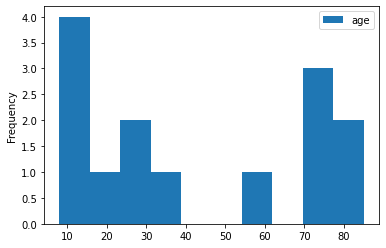

In [ ]:
age_list = [8, 10, 12, 14, 72, 74, 76, 78, 20, 25, 30, 35, 60, 85]
df = pd.DataFrame({"gender": list("MMMMMMMMFFFFFF"), "age": age_list})
df.plot.hist(by="gender")

In [ ]:
age_list = [8, 10, 12, 14, 72, 74, 76, 78, 20, 25, 30, 35, 60, 85]
df = ps.DataFrame({"gender": list("MMMMMMMMFFFFFF"), "age": age_list})
df.plot.hist(by="gender")

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-4220826790934796> in <cell line: 3>()
      1 age_list = [8, 10, 12, 14, 72, 74, 76, 78, 20, 25, 30, 35, 60, 85]
      2 df = ps.DataFrame({"gender": list("MMMMMMMMFFFFFF"), "age": age_list})
----> 3 df.plot.hist(by="gender")

/databricks/spark/python/pyspark/pandas/plot/core.py in hist(self, bins, **kwds)
    869             >>> df.plot.hist(bins=12, alpha=0.5)  # doctest: +SKIP
    870         """
--> 871         return self(kind="hist", bins=bins, **kwds)
    872 
    873     def kde(self, bw_method=None, ind=None, **kwargs):

/databricks/spark/python/pyspark/pandas/plot/core.py in __call__(self, kind, backend, **kwargs)
    496         if hasattr(plot_backend, "plot_pandas_on_spark"):
    497             # use if there's pandas-on-Spark specific method.
--> 498             return plot_backend.plot_pandas_on_spark(plot_data,

In [ ]:
# densidade
df_ = ps.DataFrame({
    'x': [1, 2, 2.5, 3, 3.5, 4, 5],
    'y': [4, 4, 4.5, 5, 5.5, 6, 6],
})

df_.plot.kde(bw_method=0.3)

In [ ]:
 df_.plot.kde(ind=[1, 2, 3, 4, 5, 6], bw_method=0.3)

In [ ]:
table_aux.plot.kde(bw_method=0.3)

In [ ]:
col_aux = table_aux['duracao']
col_aux

Out[83]: curso
Go         42.73
Hadoop     45.00
Java       42.73
Kolas      42.73
Pandas     60.00
PySpark    50.00
Python     43.33
Spark      30.00
Name: duracao, dtype: float64

In [ ]:
col_aux.plot.kde(bw_method=0.3)

In [ ]:
# dispersão
df_final.plot.scatter(x = 'num_aluno', y = 'preco')

In [ ]:
# tema escuro
fig = df_final.plot.scatter(x = 'num_aluno', y = 'preco')
fig.update_layout(template="plotly_dark")

In [ ]:
fig = df_final.plot.scatter(x = 'num_aluno', y = 'preco')
fig.update_layout(plot_bgcolor='rgb(200,200,200)',
                  paper_bgcolor ='rgb(10,10,10)')

In [ ]:
df_final.plot.scatter(x = 'num_aluno', y = 'preco', title = 'Preço por Número de Alunos')

# Convertendo o DataFrame entre Koalas e PySpark

- para converte de koalas para PySpark : *df.to_spark()* <br>
- para converte de PySpark para koalas : *df.pandas_api()*

### Koalas para PySpark

In [ ]:
df_final

,curso,num_aluno,duracao,preco
0,Go,0,42.73,1000.00
1,Hadoop,48000,45.00,1000.00
2,Java,0,42.73,2300.00
3,Kolas,1500,42.73,2300.00
4,Pandas,26000,60.00,2300.00
5,PySpark,50000,50.00,1000.00
6,Python,70000,43.33,1133.33
7,Spark,69000,30.00,1200.00


In [ ]:
df_koalas = df_final.copy()
df_koalas

,curso,num_aluno,duracao,preco
0,Go,0,42.73,1000.00
1,Hadoop,48000,45.00,1000.00
2,Java,0,42.73,2300.00
3,Kolas,1500,42.73,2300.00
4,Pandas,26000,60.00,2300.00
5,PySpark,50000,50.00,1000.00
6,Python,70000,43.33,1133.33
7,Spark,69000,30.00,1200.00


In [ ]:
type(df_koalas)

Out[6]: pyspark.pandas.frame.DataFrame

In [ ]:
# Koalas para PySpark
df_spark = df_koalas.to_spark()
type(df_spark)

Out[7]: pyspark.sql.dataframe.DataFrame

In [ ]:
df_spark.show()

+-------+---------+-------+-------+
|  curso|num_aluno|duracao|  preco|
+-------+---------+-------+-------+
|     Go|        0|  42.73| 1000.0|
| Hadoop|    48000|   45.0| 1000.0|
|   Java|        0|  42.73| 2300.0|
|  Kolas|     1500|  42.73| 2300.0|
| Pandas|    26000|   60.0| 2300.0|
|PySpark|    50000|   50.0| 1000.0|
| Python|    70000|  43.33|1133.33|
|  Spark|    69000|   30.0| 1200.0|
+-------+---------+-------+-------+



###  PySpark para Koalas

In [ ]:
# PySpark para Koalas
# método mais visto na internet, porém está depreciado

df_koalas = df_spark.to_pandas_on_spark()
type(df_koalas)


/databricks/spark/python/pyspark/sql/dataframe.py:3607: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(
Out[9]: pyspark.pandas.frame.DataFrame

In [ ]:
# PySpark para Koalas, método 2 (novo)
df_koalas= df_spark.pandas_api()
type(df_koalas)

Out[10]: pyspark.pandas.frame.DataFrame

In [ ]:
df_koalas.head()

,curso,num_aluno,duracao,preco
0,Go,0,42.73,1000.0
1,Hadoop,48000,45.00,1000.0
2,Java,0,42.73,2300.0
3,Kolas,1500,42.73,2300.0
4,Pandas,26000,60.00,2300.0


In [ ]:
df = df_spark.pandas_api(index_col='curso')
df

,num_aluno,duracao,preco
curso,,,
Go,0,42.73,1000.00
Hadoop,48000,45.00,1000.00
Java,0,42.73,2300.00
Kolas,1500,42.73,2300.00
Pandas,26000,60.00,2300.00
PySpark,50000,50.00,1000.00
Python,70000,43.33,1133.33
Spark,69000,30.00,1200.00


Já na conversão de kolas para spark não é possivel

In [ ]:
df = df_koalas.to_spark(index_col='curso')
df

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-3387341362531963> in <cell line: 1>()
----> 1 df = df_koalas.to_spark(index_col='curso')
      2 df

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/pandas/frame.py in to_spark(self, index_col)
   4808                 "the existing index is lost when converting to Spark DataFrame."
   4809             )
-> 4810         return self._to_spark(index_col)
   4811 
   4812     to_spark.__doc__ = SparkFrameMethods.__doc__

/databricks/spark/python/pyspark/pandas/frame.py in _to_spark(self, in

Esse erro ocorre devido as configurações de indexação do spark.

Quando é criado um DataFrame com a API do Pandas no Spark (Koalas), são criados um “frame interno” e um DataFrame PySpark também, como mostrado na imagem <br>
![](https://miro.medium.com/max/1400/0*DydLJYVJhaufUYtL.webp)

Fonte: https://medium.com/@courgeonpierre/how-to-run-pandas-code-on-spark-4a136f4f3e37

O frame interno é que fornecerá as conversões entre os DF Koalas e PySpark. Além disso, manterá os metadados como o mapeamento de coluna entre os dois dataframes ou o índice. E assim, permite que possamos usar as funcionalidades do Pandas que não são suportadas pelos dataframes do PySpark, como:
 - Sintaxe mutável: para que você não precise criar um novo dataframe toda vez que quiser modificá-lo;
 - Índice sequencial: para que você possa usar as funcionalidades do Pandas com base em um índice
 - Pandas dtypes



Para saber mais: https://spark.apache.org/docs/latest/api/python/user_guide/pandas_on_spark/options.html#default-index-type